<center><font size = 8><b>Digital Image Processing</b></font></center><br\><br\>
<center><font size = 6><b>Assignment 2: Morphological Image Processing</b></font></center>

### Name: shahd mohamed abdelsalam
### ID: 2100898
### Email: 2100898@eng.asu.edu.eg

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pylab

pylab.rcParams['figure.figsize'] = [15.,10.]

%matplotlib inline

### Question 11
Propose a pipeline to replace the morning background of the left image with the
night background of the right image.
<img src="Q11.PNG" alt="drawing" width="700"/>

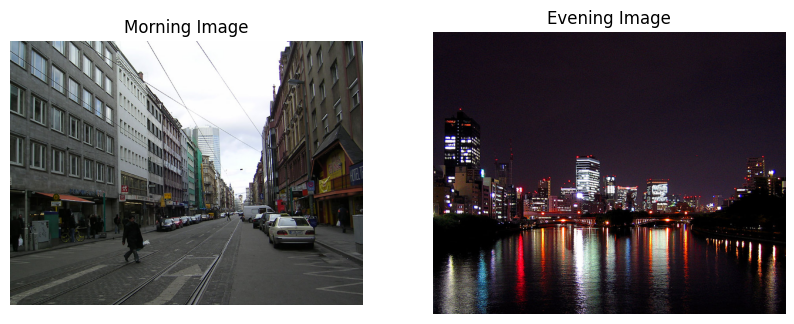

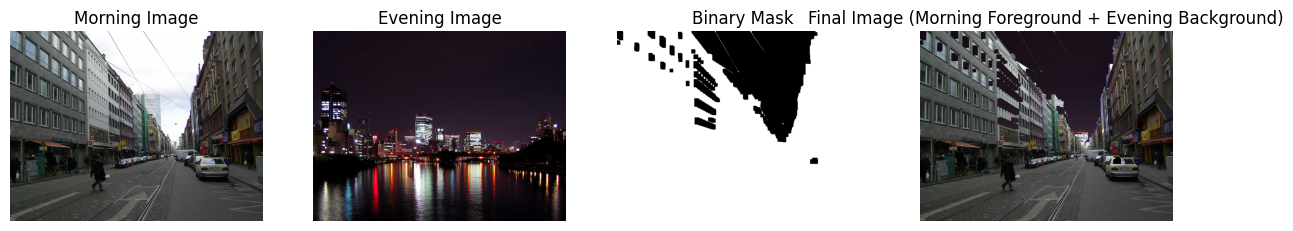

In [21]:
# TODO: Read the morning and evening images
# Define the show function to display colored or grayscale images
def show(input_image, colored=True):
    if colored:
        image_RGB = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image_RGB)
    else:
        plt.imshow(input_image, cmap="gray")  # Display grayscale image

# Read the images
morning_image = cv2.imread("morning.jpg")
evening_image = cv2.imread("evening.jpg")

# Create a figure with 2 subplots
plt.figure(figsize=(10, 5))

# Display the morning image
plt.subplot(1, 2, 1)
show(morning_image, colored=True)  # Use cmap="gray" for grayscale images
plt.title("Morning Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis

# Display the evening image
plt.subplot(1, 2, 2)
show(evening_image, colored=True)  # Use cmap="gray" for grayscale images
plt.title("Evening Image")  # Adding a title for better clarity
plt.axis("off")  # Turn off the axis
# Show the images
plt.show()
##############################################################################################################################
# TODO: Replace the morning background with the evening

# Define the show function to display colored or grayscale images
def show(input_image, colored=True):
    if colored:
        image_RGB = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image_RGB)
    else:
        plt.imshow(input_image, cmap="gray")  # Display grayscale image

# Read the images
morning_image = cv2.imread("morning.jpg")
evening_image = cv2.imread("evening.jpg")

# Ensure both images are the same size
evening_image = cv2.resize(evening_image, (morning_image.shape[1], morning_image.shape[0]))

# Step 1: Convert the morning image to grayscale
morning_gray = cv2.cvtColor(morning_image, cv2.COLOR_BGR2GRAY)

# Step 2: Threshold the grayscale image to create a binary mask
_, binary_mask = cv2.threshold(morning_gray, 120, 255, cv2.THRESH_BINARY_INV)

# Step 3: Refine the binary mask using morphological operations
kernel = np.ones((5, 5), np.uint8)
binary_mask = cv2.dilate(binary_mask, kernel, iterations=3)
binary_mask = cv2.erode(binary_mask, kernel, iterations=3)

# Step 4: Invert the binary mask for extracting the foreground
binary_mask_inv = cv2.bitwise_not(binary_mask)

# Step 5: Extract the foreground from the morning image
foreground = cv2.bitwise_and(morning_image, morning_image, mask=binary_mask)

# Step 6: Extract the background from the evening image
background = cv2.bitwise_and(evening_image, evening_image, mask=binary_mask_inv)

# Step 7: Combine the foreground and the background
final_image = cv2.add(foreground, background)

# Display the results
plt.figure(figsize=(15, 10))

# Original morning image
plt.subplot(1, 4, 1)
show(morning_image, colored=True)
plt.title("Morning Image")
plt.axis("off")

# Original evening image
plt.subplot(1, 4, 2)
show(evening_image, colored=True)
plt.title("Evening Image")
plt.axis("off")

# Binary mask
plt.subplot(1, 4, 3)
show(binary_mask, colored=False)
plt.title("Binary Mask")
plt.axis("off")

# Final blended image
plt.subplot(1, 4, 4)
show(final_image, colored=True)
plt.title("Final Image (Morning Foreground + Evening Background)")
plt.axis("off")

plt.show()








### Question 12
Design an image processing pipeline for highlighting the
coins available in the following image as shown:
<img src="Q12.PNG" alt="drawing" width="700"/>
<b>Note: </b>Represent both boundaries as circles.

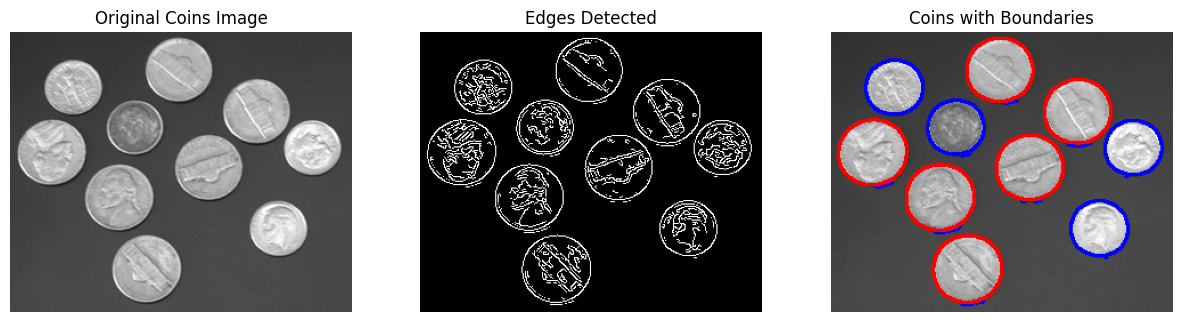

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the show function to display colored or grayscale images
def show(input_image, colored=True):
    if colored:
        image_RGB = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        plt.imshow(image_RGB)
    else:
        plt.imshow(input_image, cmap="gray")  # Display grayscale image

# Step 1: Read the coins image
coins_image = cv2.imread("coins.png")

# Convert to grayscale
coins_gray = cv2.cvtColor(coins_image, cv2.COLOR_BGR2GRAY)

# Step 2: Detect edges using Canny edge detection
edges = cv2.Canny(coins_gray, threshold1=80, threshold2=150, apertureSize=3)

# Step 3: Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image to draw the boundaries
result_image = coins_image.copy()

# Step 4: Loop through each contour and classify based on area
for contour in contours:
    area = cv2.contourArea(contour)
    
    # Classify large vs small coins (adjust the threshold as needed)
    if area > 2000:  # Large coins
        color = (0, 0, 255)  
    else:  # Small coins
        color = (255, 0, 0)  
    
    # Draw the boundary on the image
    cv2.drawContours(result_image, [contour], -1, color, 2)

# Step 5: Display the original, edges, and result images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
show(coins_image, colored=True)
plt.title("Original Coins Image")
plt.axis("off")

# Edges
plt.subplot(1, 3, 2)
show(edges, colored=False)
plt.title("Edges Detected")
plt.axis("off")

# Final image with boundaries
plt.subplot(1, 3, 3)
show(result_image, colored=True)
plt.title("Coins with Boundaries")
plt.axis("off")

plt.show()
